In [1]:
#Importar bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Exploração de dados



In [2]:
#Carregar os datasets
train = pd.read_csv('/content/drive/My Drive/Data Loan/train.csv')
test = pd.read_csv('/content/drive/My Drive/Data Loan/test.csv')

Shape of the dataset

In [3]:
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print(train.shape)
print(test.shape)
print(data.shape)

(614, 14)
(367, 13)
(981, 14)


Os datasets foram unidos para não ter que realizar o mesmo processo duas vezes, adicionei a coluna "sorce" para poder dividi-lo depois.
Agora irei olhar algumas estatísticas das variáveis númericas.

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Pelos valores diferentes de count percebe-se que há valores faltando.
Irei ver a quantidade de valores fatantes para cada varável a seguir.

In [7]:
data.apply(lambda x: sum(x.isnull()))

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

Há varias variáveis com valores faltantes, e Loan_Status tem 367 devido ao dataset de test não ter essa variável.

In [8]:
data.apply(lambda x: len (x.unique ()))

Loan_ID              981
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
Loan_Status            3
source                 2
dtype: int64

In [9]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
source                object
dtype: object

A seguir irei ver os valores das variaávei categoricas e sua frequência

In [10]:
#Filtrar colunas categóricas
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Excluir Loan_ID  e source
categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID','source']]
#Imprimir a freqência das categorias
for col in categorical_columns:
    print('\nFrequência da variável categórica %s'%col)
    print(data[col].value_counts())
    print('\nFrequência da variável categórica %s em porcentagem'%col)
    print(data[col].value_counts(normalize=True)*100)
    print("==========================================================================")


Frequência da variável categórica Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequência da variável categórica Gender em porcentagem
Male      80.982236
Female    19.017764
Name: Gender, dtype: float64

Frequência da variável categórica Married
Yes    631
No     347
Name: Married, dtype: int64

Frequência da variável categórica Married em porcentagem
Yes    64.519427
No     35.480573
Name: Married, dtype: float64

Frequência da variável categórica Dependents
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

Frequência da variável categórica Dependents em porcentagem
0     57.008368
1     16.736402
2     16.736402
3+     9.518828
Name: Dependents, dtype: float64

Frequência da variável categórica Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequência da variável categórica Education em porcentagem
Graduate        77.777778
Not Graduate    22.222222
Name: Education, dtype: float64

Frequência da variável cate

Isso mostrou os valores e a frequencia das categorias de cada variável.

#Limpando Dados

A aqui irei tratar os valores faltantes vistos anteriormente.

In [11]:
#Para variável Gender irei imputar valores utilizando o mode
data["Gender"].fillna(train["Gender"].mode()[0],inplace=True)

In [12]:
##Para variável Married irei imputar valores utilizando o mode
data["Married"].fillna(train["Married"].mode()[0],inplace=True)
data.apply(lambda x: sum(x.isnull()))

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [13]:
from scipy.stats import mode

#Determinar o modo para cada categoria de Dependents
Dependents_mode = data.pivot_table(values='Dependents', columns='Married', aggfunc=(lambda x: mode(x).mode[0]))
print('Modo para cada Dependents:')
print(Dependents_mode)

#Obter uma variável booleana especificando valores de Dependents ausentes
miss_bool = data['Dependents'].isnull()

#Impute dados e verifique #missing values ​​antes e depois da imputação para confirmar
print('Valores em falta: %d' % sum(miss_bool))
data.loc[miss_bool,'Dependents'] = data.loc[miss_bool,'Married'].apply(lambda x: Dependents_mode [x])
print('Final em falta: %d' % sum(data['Dependents'].isnull()))

Modo para cada Dependents:
Married    No Yes
Dependents  0   0
Valores em falta: 25
Final em falta: 0


Para a variável Depends resolvi fazer de outra forma, como há uma relação entre o número de dependents e married resolvi usar o mode dependendo da categoria de married.

In [14]:
##Para variável Self_Employed irei imputar valores utilizando o mode
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

Irei obter algumas informações sobre minha hipótese sobre a relação entre LoanAmount e Education, para poder imputar valores em LoanAmount com base e Education

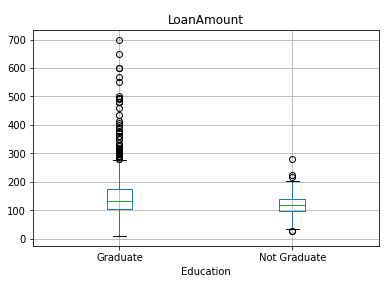

In [15]:
import matplotlib.pyplot as plt
data.boxplot(column='LoanAmount',by="Education" )
plt.suptitle(" ")
plt.show()

In [16]:
sis = data.groupby("Education")["LoanAmount"].mean()
sis

Education
Graduate        149.297043
Not Graduate    118.471429
Name: LoanAmount, dtype: float64

In [17]:


#Determinar a média para cada
table = data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

#Obter uma variável booleana especificando valores de LoanAmount ausentes
miss_bool = data['LoanAmount'].isnull()

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

#Impute dados e verifique #missing values ​​antes e depois da imputação para confirmar
print('Valores em falta: %d' % sum(miss_bool))
data['LoanAmount'].fillna(data[miss_bool].apply(fage, axis=1), inplace=True)
print('Final em falta: %d' % sum(data['LoanAmount'].isnull()))

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         117.0
Yes               150.0         130.0
Valores em falta: 27
Final em falta: 0


Aqui imputei valores utilizando a mediana dependendo do valor de Education e Self_Employed

Range of medv = { 6.0 480.0}
360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


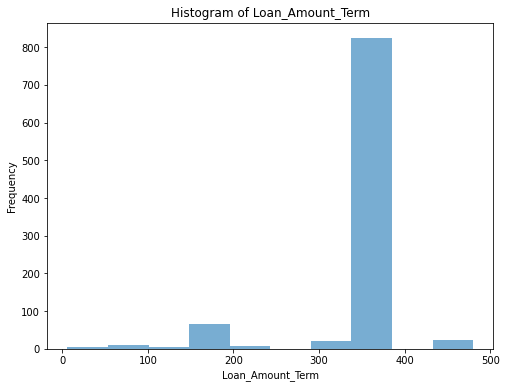

In [18]:
import matplotlib.pyplot as plt

print('Range of medv = { ' + str(min(data.Loan_Amount_Term)) + ' ' + str(max(data.Loan_Amount_Term)) + '}')

ax = plt.figure(figsize=(8, 6)).gca() # define axis
data.Loan_Amount_Term.plot.hist(ax = ax,alpha = 0.6)
plt.title('Histogram of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
print(data['Loan_Amount_Term'].value_counts())

In [19]:
#Imputar valores em Loan_Amount_Term utilizando mode
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)

In [20]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [21]:
#Imputar valores em Credit_History utilizando mode
print('Valores em falta: %d' % sum(data['Credit_History'].isnull()))
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
print('Final em falta: %d' % sum(data['Credit_History'].isnull()))

Valores em falta: 79
Final em falta: 0


In [22]:
data.apply(lambda x: sum(x.isnull()))

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

Todos os valores nulos foram tratados.

#Feature Engineering

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


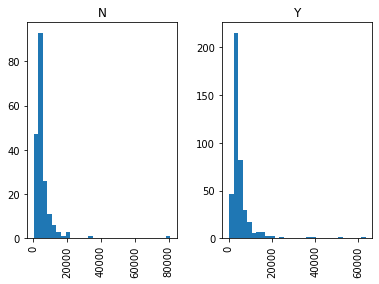

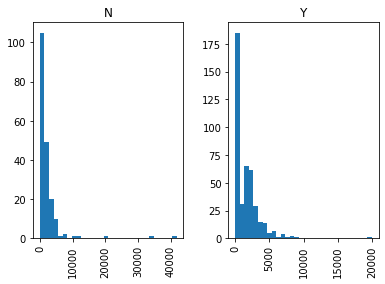

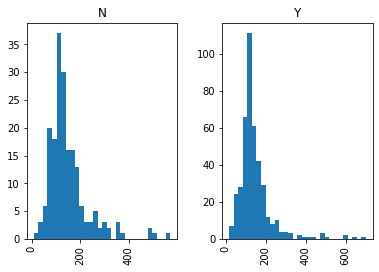

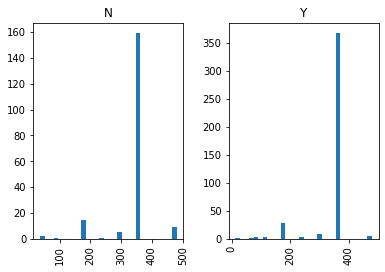

In [24]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in cols:
  data.hist(column=col,by="Loan_Status",bins=30)

'Done'

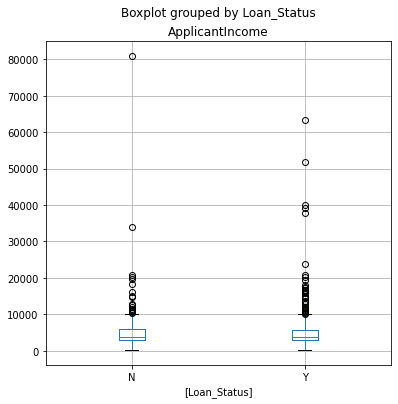

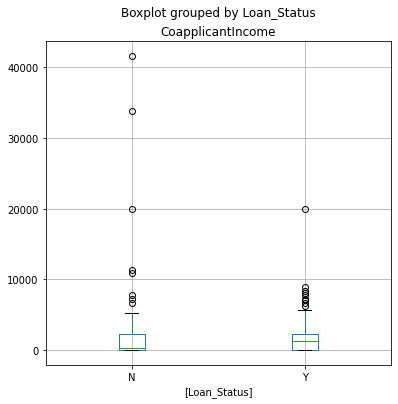

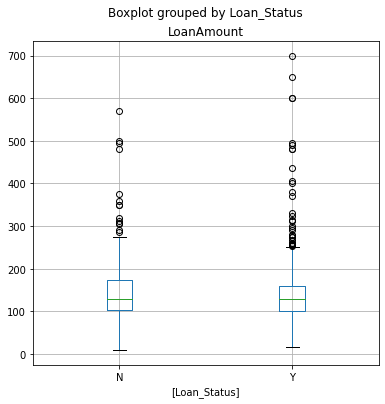

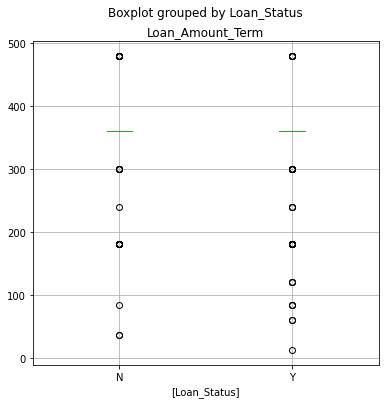

In [25]:
# Create Boxplots

def create_boxplots(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-4]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64] 
           and df[col].name != "Loan_Status"):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['Loan_Status'])          
    return('Done') 

create_boxplots(data)

Não há uma grande diferença entre ser aprovado ou não com base nas variáveis numéricas, é provavel que o valor que mais afete é o Credit_History.

Irei criar duas novas variáveis, Total incomo e Loan/month.

In [26]:
data['TotalIncome'] = data['CoapplicantIncome'] + data['ApplicantIncome']

In [27]:
data['Loan/month'] = data['LoanAmount']/data['Loan_Amount_Term']

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,TotalIncome,Loan/month
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,train,5849.0,0.361111
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train,4941.0,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train,6000.0,0.391667


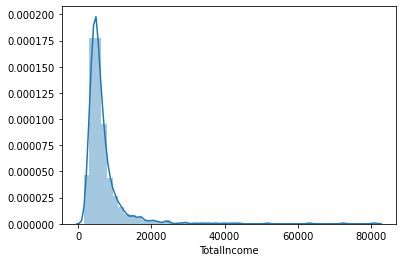

In [29]:
sns.distplot(data["TotalIncome"])

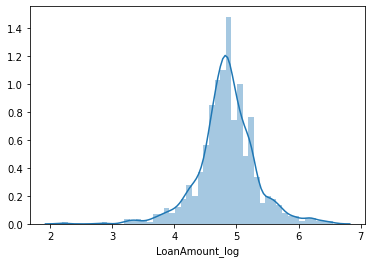

In [30]:
data["LoanAmount_log"]=np.log(data["LoanAmount"])
sns.distplot(data["LoanAmount_log"])

In [31]:
data["TotalIncome_log"]=np.log(data["TotalIncome"])

Remover a skewness com a transformação em log.

#Modelo

In [32]:
data=data.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

Removi colunas que não irei precisar.

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,source,TotalIncome,Loan/month,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,train,5849.0,0.361111,4.867534,8.674026
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,train,6091.0,0.355556,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,train,3000.0,0.183333,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,train,4941.0,0.333333,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,train,6000.0,0.391667,4.948760,8.699515


Irei dividir em o dataset ao que era antes.

In [34]:
#Dividir o teste e o treinamento
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

#Dropar colunas desnecessárias
test.drop(['Loan_Status', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

#Exportando arquivos em versões modificadas
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv", index=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#One Hot Coding:
train = pd.get_dummies(train, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
test = pd.get_dummies(test, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

Formatação dos dados usando o get_dummies

In [36]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes 

Loan_ID                     object
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
Loan/month                 float64
LoanAmount_log             float64
TotalIncome_log            float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

Codifiquei Loan_Status usando LabelEncoder.

In [37]:
train.head()

,Loan_ID,Credit_History,Loan_Status,TotalIncome,Loan/month,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,1,5849.0,0.361111,4.867534,8.674026,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,LP001003,1.0,0,6091.0,0.355556,4.852030,8.714568,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,LP001005,1.0,1,3000.0,0.183333,4.189655,8.006368,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,LP001006,1.0,1,4941.0,0.333333,4.787492,8.505323,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,LP001008,1.0,1,6000.0,0.391667,4.948760,8.699515,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [38]:
X=train.drop(["Loan_Status", "Loan_ID"],1)
X.head()

,Credit_History,TotalIncome,Loan/month,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849.0,0.361111,4.867534,8.674026,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1.0,6091.0,0.355556,4.852030,8.714568,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1.0,3000.0,0.183333,4.189655,8.006368,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1.0,4941.0,0.333333,4.787492,8.505323,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1.0,6000.0,0.391667,4.948760,8.699515,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [39]:
y=train[["Loan_Status"]]
y.head(2)

,Loan_Status
0,1
1,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

Dividi conjunto de dados em teste e treinamento com o objetivo de evitar o overfitting.

Irei começar com regressão logística.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
logistic_model = LogisticRegression(random_state=1)

In [44]:
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [46]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [47]:
score_logistic

78.91891891891892

Como o modelo acerta 79% das vezes, temos um bom poder de previsão, mas poderia ser maior.

In [48]:
test1 = test.drop('Loan_ID', axis=1)
pred_test_logistic = logistic_model.predict(test1)

In [49]:
test.head()

,Loan_ID,Credit_History,TotalIncome,Loan/month,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
614,LP001015,1.0,5720.0,0.305556,4.700480,8.651724,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
615,LP001022,1.0,4576.0,0.350000,4.836282,8.428581,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
616,LP001031,1.0,6800.0,0.577778,5.337538,8.824678,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
617,LP001035,1.0,4886.0,0.277778,4.605170,8.494129,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
618,LP001051,1.0,3276.0,0.216667,4.356709,8.094378,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


Irei criar uma função para gerar uma submissão para o site Analytics Vidhya

In [50]:
def submission(filename, teste):
  IDcol = ['Loan_ID','Loan_Status']
  test_g=test
  test_g['Loan_Status'] = teste
  submission = pd.DataFrame({ x: test_g[x] for x in IDcol})
  submission['Loan_Status'] = submission['Loan_Status'].apply(lambda x: "Y" if x == 1 else "N")
  submission.to_csv(filename, index=False)

In [51]:
submission("sub1.csv", pred_test_logistic)

In [52]:
test.drop(['Loan_Status'], axis=1, inplace=True)

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


76.75675675675676

In [54]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
score_xgb

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


77.83783783783784

O regressão logistica se saiu melhor.

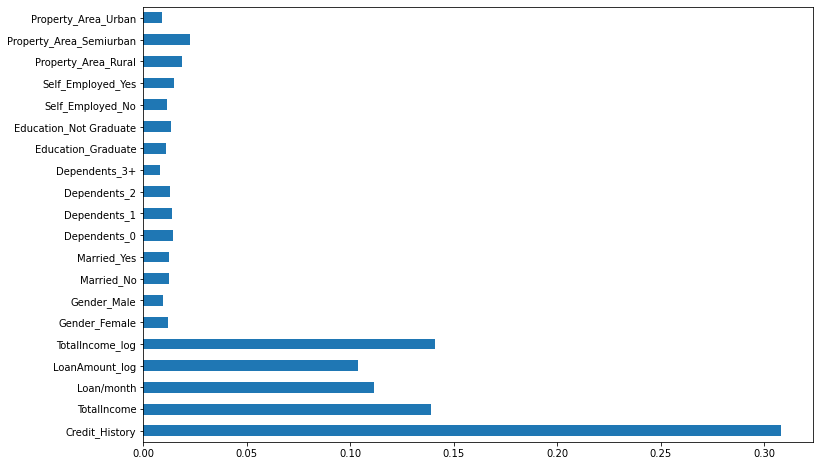

In [55]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

Aqui confirmamos o que foi dito anteriormente e vemos que o Credit_History é o fator mais importante,